# Bay Wheels 2019 Exploration  — Communicate Data Findings Project

## by Juan Daniel Alonso

> The Dataset on which we have created these visualizations is a reformed version (we have eliminated some erroneous observations and added new variables) of the dataset made available to the public by the company   [here]( https://www.lyft.com/bikes/bay-wheels/system-data)

##  Overview

A name change, legal disputes and battery explosions. Those are the challenging events experimented by Bay Wheels in 2019. All this has left an unmistakable signature in its yearly performance and you will be able to see it in this presentation.

We will start by explaining some basic characteristics of Bay Wheels' 2019 data: Who are the users and how they use the bikes. Then, we will show how business turbulences have affected its performance and the effect that it will have in its future.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

fordgo_clean = pd.read_csv('Fordgo_exploration.csv' )

fordgo_clean['start_time'] = pd.to_datetime(fordgo_clean['start_time'])

fordgo_clean['end_time'] = pd.to_datetime(fordgo_clean['end_time'])

## Most rides are short.

We can see that the user's of Bay Wheels use the bikes mostly for short trips as 95% of the trips take less than half an hour (green line), there is, however, a long tail of outliers which stretches lengthening and narrowing until the maximum of 24 hours.


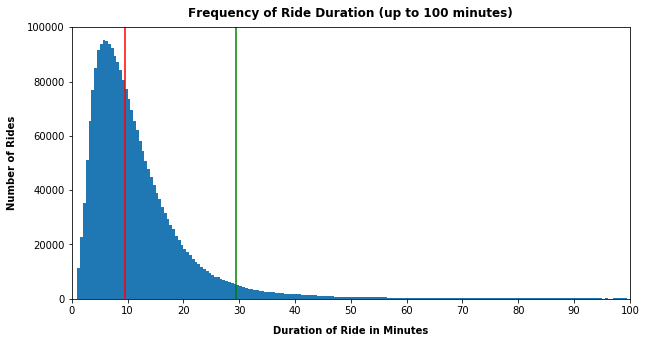

In [3]:
# Array with duration 
duration_array = np.array(fordgo_clean.duration_min)

#Plot histogram to see the frecuency of travel duration

plt.figure(figsize=[10,5]).tight_layout(pad=20)

bin_edges = np.arange(0, 100, 0.5)

plt.hist(duration_array, bins= bin_edges)

plt.axvline(np.median(duration_array), color='r')

plt.axvline(np.quantile(duration_array, 0.95), color='g')

plt.title('Frequency of Ride Duration (up to 100 minutes)', pad=10, weight='bold')

plt.xlabel('Duration of Ride in Minutes', labelpad=10, weight='bold')

plt.ylabel('Number of Rides', labelpad=10, weight='bold')

plt.xticks([0,10,20,30,40,50,60,70, 80,90,100])

plt.xlim(0 ,100);

## More rides from subscribers but its duration tend to be shorter.

Casual Customer rides account for only 25% of the total rides, however,  the ride duration tends to be much larger for those casual customers than for subscribers.

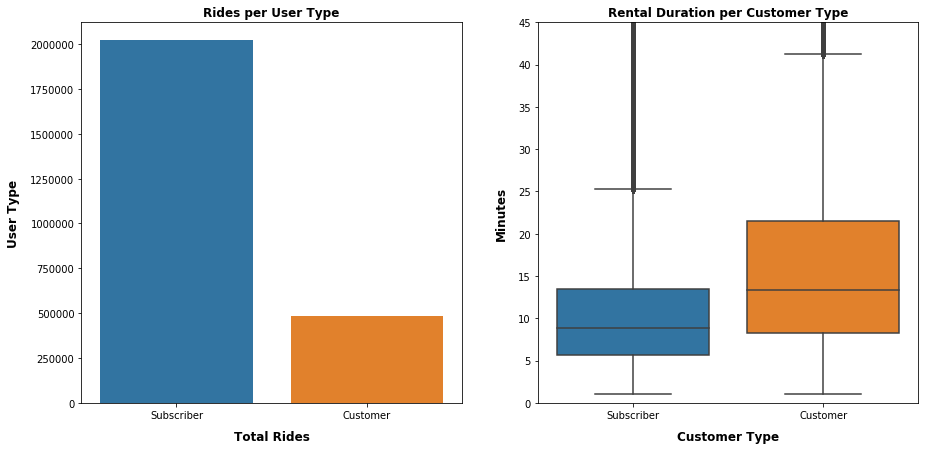

In [4]:
# Customer Type Analysis

plt.figure(figsize=[15, 7]).tight_layout(pad=10.0)

# Customer Type total rides
plt.subplot(1,2,1)
sb.countplot(data= fordgo_clean, x='user_type')

plt.title('Rides per User Type', weight='bold', size=12)
plt.ylabel('User Type', labelpad=10, weight='bold', size=12)
plt.xlabel('Total Rides', labelpad=10, weight='bold', size=12)


# Customer Type Travel Duration
plt.subplot(1,2,2)



sb.boxplot(data = fordgo_clean, x = 'user_type', y = 'duration_min' )

plt.title('Rental Duration per Customer Type', weight='bold', size=12)
plt.ylabel('Minutes', labelpad=10, weight='bold', size=12)
plt.xlabel('Customer Type', labelpad=10, weight='bold', size=12)

plt.ylim(0,45);


## Most common travels happen during the week in rush hour

The bikes are used mostly during the week, 8 AM and 5 PM are the favourite starting time of our users and their most common duration are between 5 and 10 minutes.


In [5]:

#  Create DataFrame from Customer grouped by hour of day
startind_customer = fordgo_clean[fordgo_clean['user_type'] == 'Customer'].set_index('start_time')
fg_hour_of_day_customer = startind_customer.groupby(startind_customer.index.hour).count()['start_station_longitude']


#  Create DataFrame from Subscriber grouped by hour of day
startind_subscriber = fordgo_clean[fordgo_clean['user_type'] == 'Subscriber'].set_index('start_time')
fg_hour_of_day_subscriber = startind_subscriber.groupby(startind_subscriber.index.hour).count()['start_station_longitude']

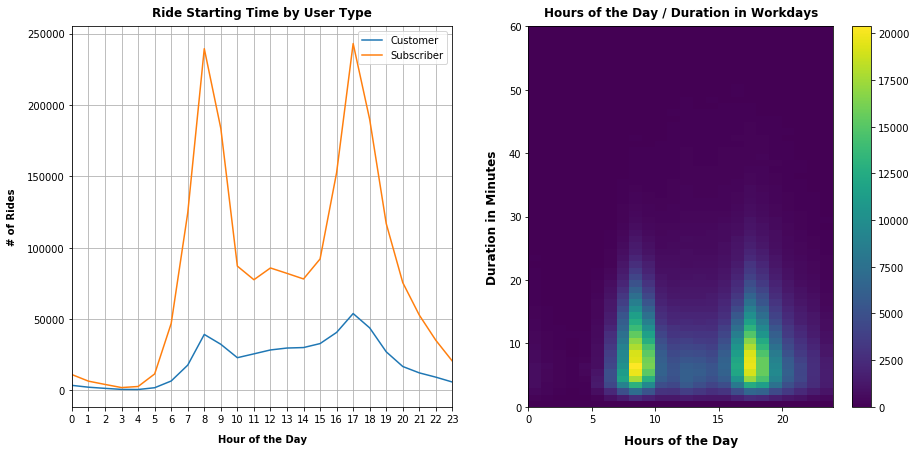

In [6]:
plt.figure(figsize=[15,7]).tight_layout(pad=10.0)


# Line Plot usage of bike throughout the day for user segments
plt.subplot(1,2,1)

fg_hour_of_day_customer.plot()
fg_hour_of_day_subscriber.plot()


plt.title('Ride Starting Time by User Type', pad=10, weight='bold')

plt.xlabel('Hour of the Day',labelpad=10, weight='bold')

plt.ylabel('# of Rides', labelpad=10, weight='bold')

plt.grid()

plt.xticks(np.arange(0, 24, 1))

plt.legend(['Customer', 'Subscriber']);

# Heatmap Starting hour, Frequency

plt.subplot(1,2,2)

plt.hist2d(fordgo_clean[fordgo_clean.business_weekday == 'Workday'].start_time.dt.hour, fordgo_clean[fordgo_clean.business_weekday == 'Workday'].duration_min,[24,60], [[0,24],[0,60]] )

plt.xlabel('Hours of the Day', labelpad=10, weight='bold', size=12)
plt.ylabel('Duration in Minutes', labelpad=10, weight='bold', size=12)

plt.title('Hours of the Day / Duration in Workdays', pad=10, weight='bold', size=12)

plt.colorbar();

## Unstable total numbers, longer summer rides

The monthly number of rides fluctuated a lot around the 200,000/month mean.  That was probably caused for external causes —cold in winter, [spring rainier as usual](https://www.sfgate.com/weather/article/May-San-Francisco-rainfall-total-above-average-13858927.php)— as well as internal stumbles —Removal of bikes in [May](https://techcrunch.com/2019/07/21/lyft-e-bikes-san-francisco/), introduction of stationless bikes in June-July, removal of these in [August](https://www.theverge.com/2019/7/31/20749396/lyft-electric-bikes-pulled-san-francisco-battery-fires-motivate-bay-wheels), reintroduction in December—.


This turbulence had less effect on the duration. Although we can see falls in the average in May and August, we can see that the lines form a parabola where, in the warm central months, the time that users spend on the bike increases.

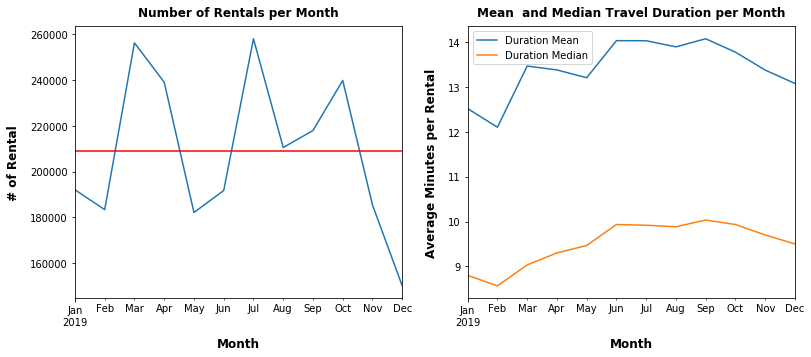

In [7]:
# Resample data by month and get the average duration in minutes

fordgo_monthly_dmean = fordgo_clean.set_index('start_time').resample('M')['duration_min'].mean() 

# Resample data by month and get the median duration in minutes

fordgo_monthly_dmedian = fordgo_clean.set_index('start_time').resample('M')['duration_min'].median() 

# Resample data by month and get the total frequency

fordgo_monthly_count = fordgo_clean.set_index('start_time').resample('M')['duration_min'].count() 

# Draw a line plot with frequency and mean duration 

plt.figure(figsize=[10,5]).tight_layout(pad=20)



plt.subplot(1,2,1)
fordgo_monthly_count.plot()
plt.title('Number of Rentals per Month',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('# of Rental', labelpad=10, weight='bold', size=12)
plt.axhline(fordgo_monthly_count.mean(), color ='r')
plt.subplots_adjust(left=0, right=1)

plt.subplot(1,2,2)
fordgo_monthly_dmean.plot()
fordgo_monthly_dmedian.plot()

plt.title('Mean  and Median Travel Duration per Month',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('Average Minutes per Rental', labelpad=10, weight='bold', size=12)
plt.subplots_adjust(left=0, right=1)
plt.legend(['Duration Mean', 'Duration Median']);

##  Subscribers hesitate, casual customers increase.

It seems that these business upheavals have taken their toll on the number of subscriber trips. Subscriber trips go up and down throughout the year, before plummeting in December, meanwhile, the number of casual customer rides keeps growing steadily and peaks on the last month, indicating some degree of transfer between both groups.

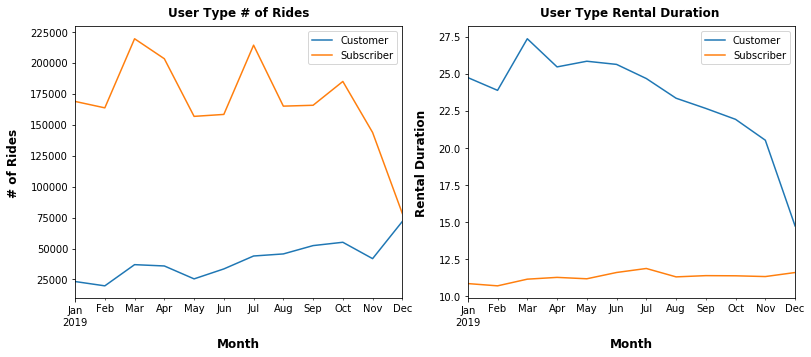

In [8]:
# Filter rows with user type Customer, resample it by month and count frequencies
fordgo_monthly_customer_count = fordgo_clean[fordgo_clean.user_type == 'Customer'].set_index('start_time').resample('M')['duration_min'].count() 


# Filter rows with user type Subscriber, resample it by month and count frequencies
fordgo_monthly_subscriber_count = fordgo_clean[fordgo_clean.user_type == 'Subscriber'].set_index('start_time').resample('M')['duration_min'].count() 

# Filter rows with user type Customer, resample it by month and get mean duration
fordgo_monthly_customer = fordgo_clean[fordgo_clean.user_type == 'Customer'].set_index('start_time').resample('M')['duration_min'].mean() 

# Filter rows with user type Subscriber, resample it by month and get mean duration

fordgo_monthly_subscriber = fordgo_clean[fordgo_clean.user_type == 'Subscriber'].set_index('start_time').resample('M')['duration_min'].mean() 

plt.figure(figsize=[10,5]).tight_layout(pad=20)

#rides
plt.subplot(1,2,1)
fordgo_monthly_customer_count.plot()
fordgo_monthly_subscriber_count.plot()
plt.title('User Type # of Rides',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('# of Rides', labelpad=10, weight='bold', size=12)
plt.subplots_adjust(left=0, right=1)
plt.legend(['Customer', 'Subscriber'])




# Duration
plt.subplot(1,2,2)
fordgo_monthly_customer.plot()
fordgo_monthly_subscriber.plot()
plt.title('User Type Rental Duration ',pad=10, weight='bold', size=12)
plt.xlabel('Month', labelpad=10, weight='bold', size=12)
plt.ylabel('Rental Duration', labelpad=10, weight='bold', size=12)
plt.subplots_adjust(left=0, right=1)
plt.legend(['Customer', 'Subscriber']);

## Thinking about the future

Reading the 2019 data, it may seem that Bay Wheels is having a hard time retaining subscriber customers. If that was true, it would be a big business problem.

It may also be that the so-called transference does not exist, and the patterns observed in 2019 are cyclical if observed on an annual level.